# Représentations graphiques simples
## Tracé d’une fonction
À l’aide de la fonction **plot**, tracer le graphe de la fonction sinus pour 50 points entre $-\pi$ et $\pi$.

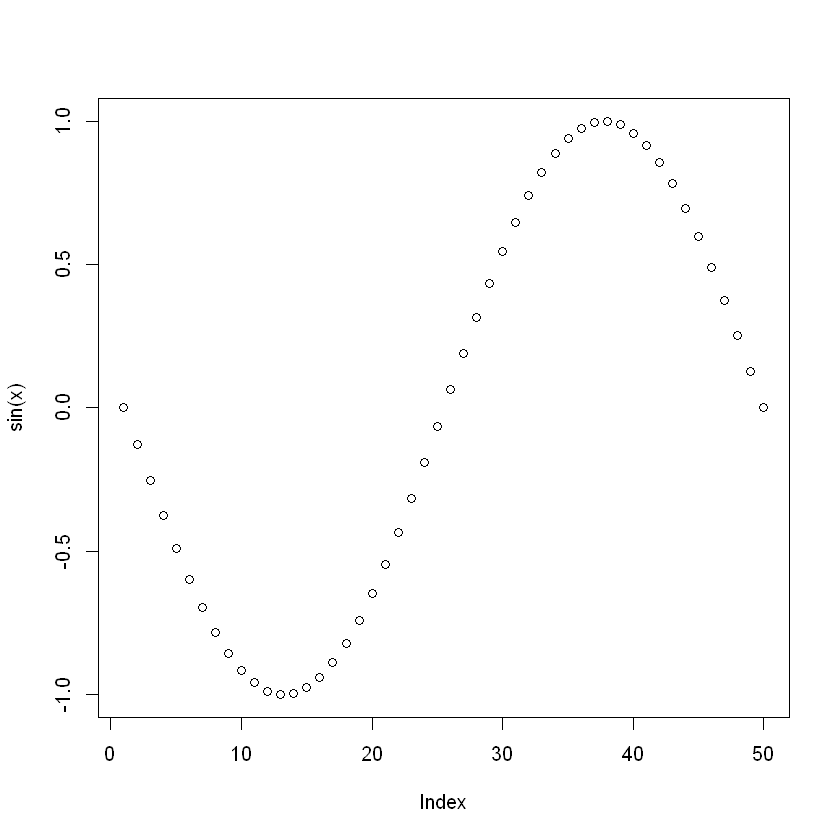

In [1]:
x <- seq(-pi, pi, length.out = 50)
plot(sin(x))

Faire la même représentation avec une ligne, puis avec une ligne reliant les points (argument *type*)

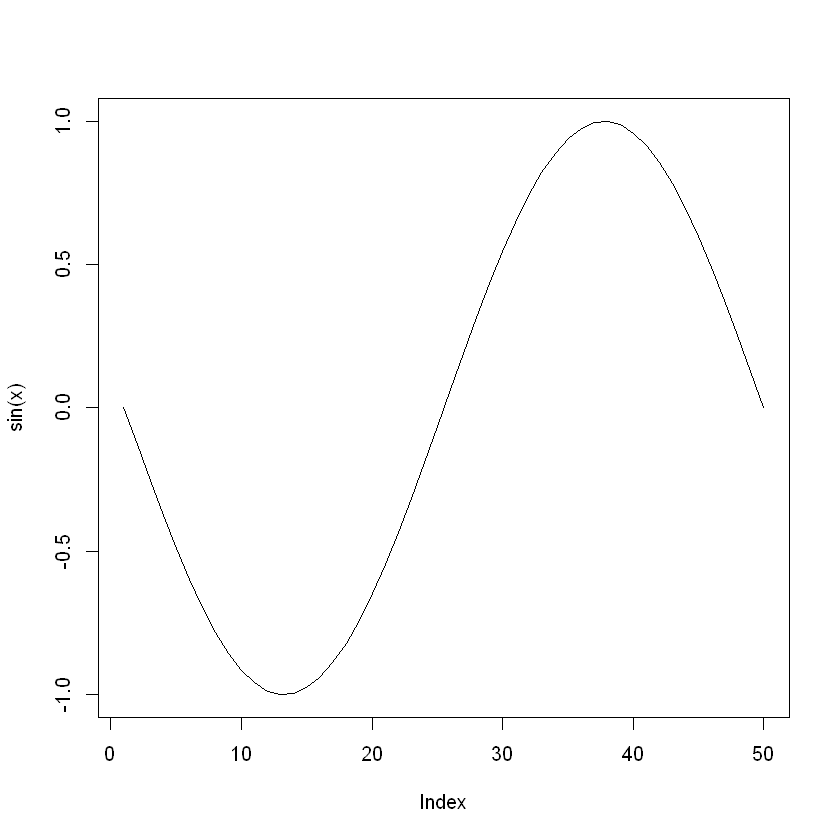

In [2]:
plot(sin(x), type = "l")

Ajouter le titre suivant : **Graphe de la fonction sinus** (argument *main*)

Warning message in plot.xy(xy, type, ...):
"le type de graphe 'bc' sera tronqué au premier caractère"

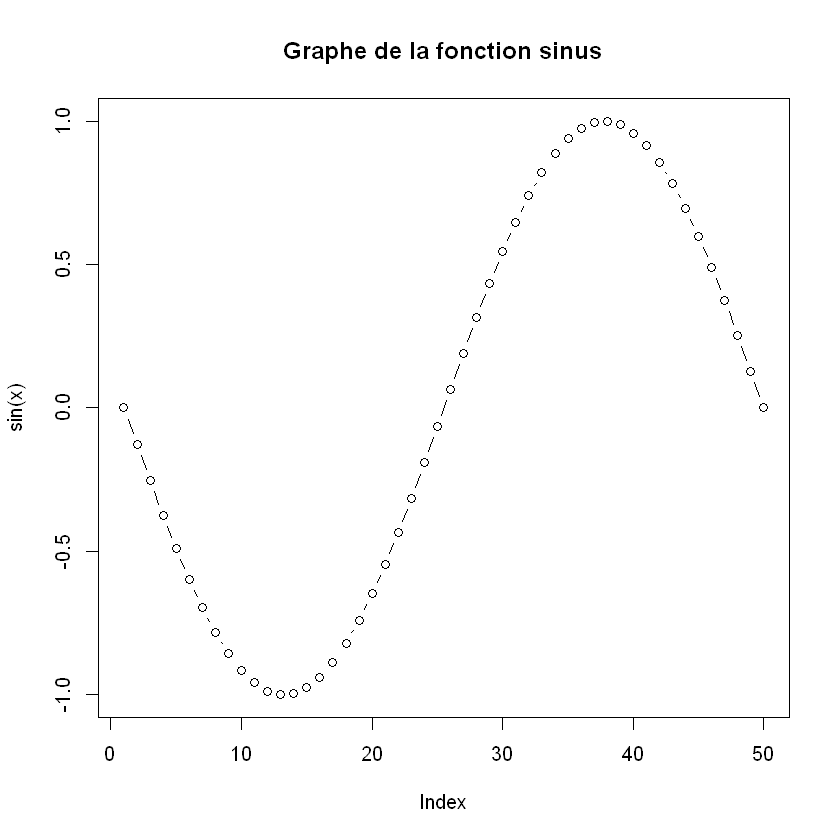

In [3]:
plot(sin(x),
     type = "bc",
     main = "Graphe de la fonction sinus")

Utiliser la fonction **curve** et obtenir la même représentation

Warning message in plot.xy(xy, type, ...):
"le type de graphe 'bc' sera tronqué au premier caractère"

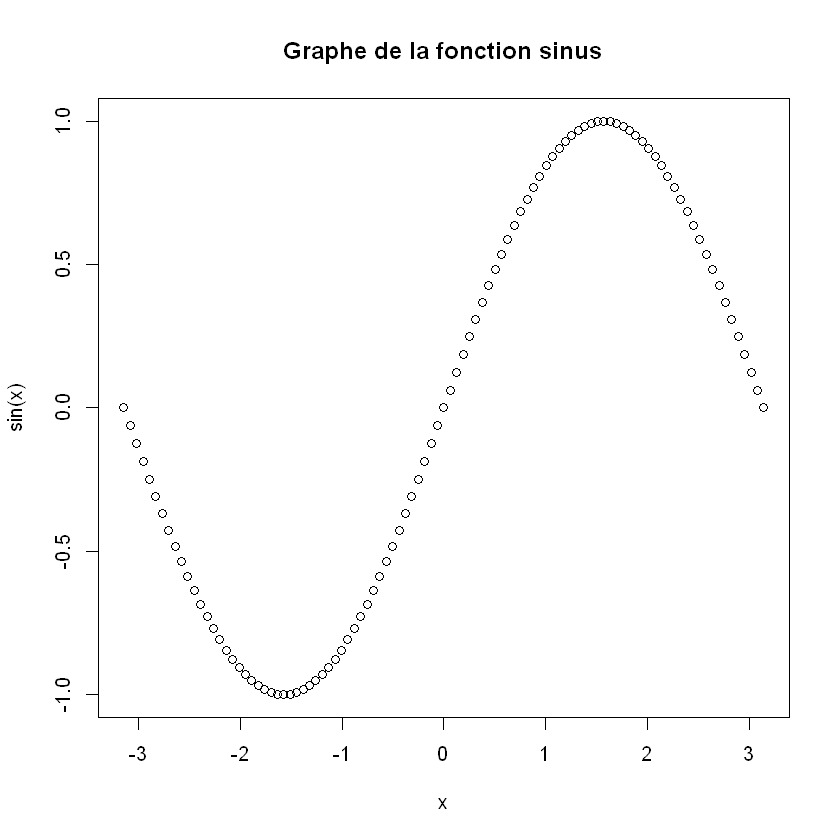

In [4]:
curve(sin(x),
      type = "bc",
      from = -pi, to = pi,
      main = "Graphe de la fonction sinus")

## Tracé de deux fonctions
Sur le même graphique, tracer les graphes des fonctions sinus et cosinus entre $-\pi$ et $\pi$.
- fonction **lines** ou **points**) pour un deuxième graphe
- argument *lty* pour le motif
- fonction **legend**

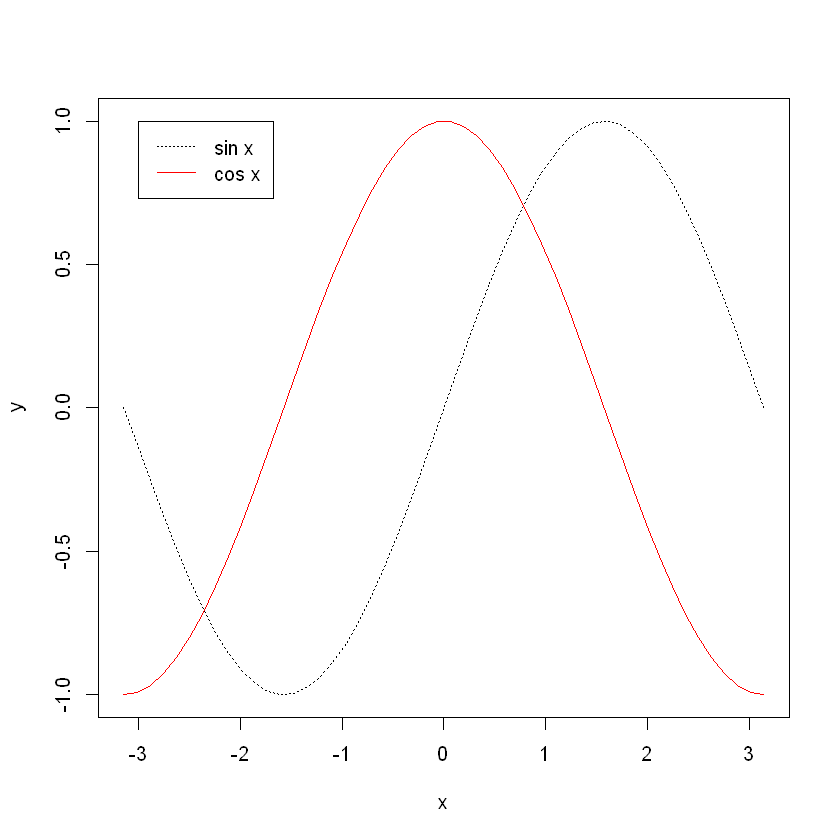

In [5]:
plot(x, sin(x),
     ylab = "y",
     type = "l",
     lty = 3)

lines(x, cos(x), col = "red")

legend(-3, 1,
       legend = c("sin x", "cos x"),
       col = c("black", "red"),
       lty = c(3, 1))

## Variable quantitative continue
Jeu de données **etat2**.

In [6]:
etat <- read.csv("../TD3 - Importation/donnees//etat2.csv", header = T)

Représenter la variable Income sous forme d’histogramme.

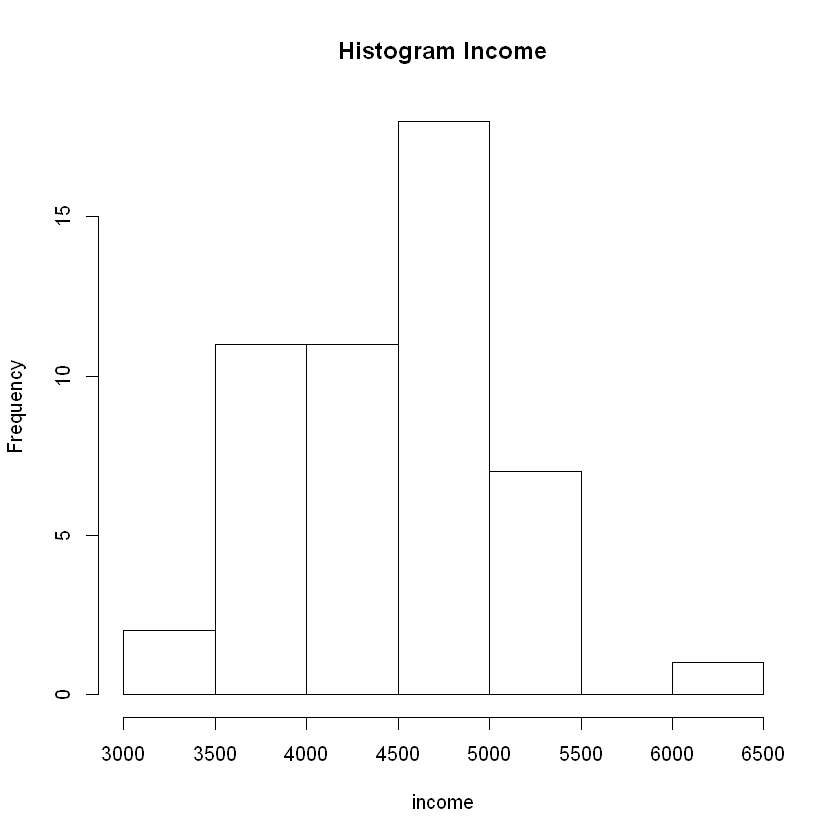

In [7]:
hist(etat$Income,
     main = "Histogram Income",
     xlab = "income")

Représenter le même histogramme mais avec les classes [3000,4000], ]4000,5000], ]5000,6000], ]6000,7000]

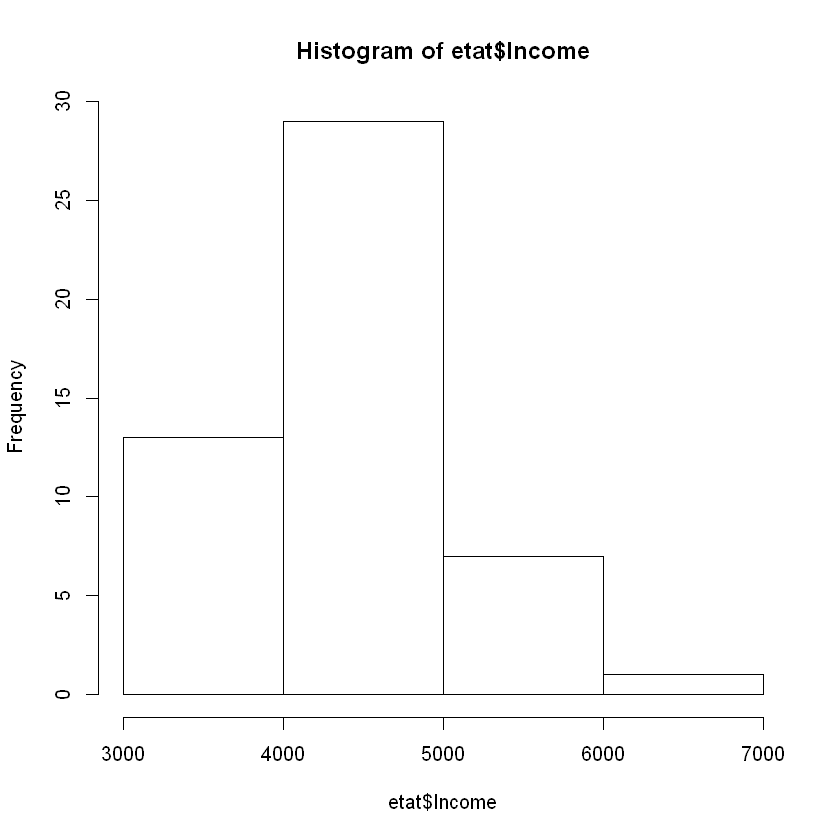

In [8]:
hist(etat$Income,
     breaks = seq(3000, 7000, by = 1000),
     include.lowest = 1)

Faire la même représentation mais en donnant les probabilités empiriques en ordonnée (autrement dit en affichant le pourcentage de l’effectif par classe)

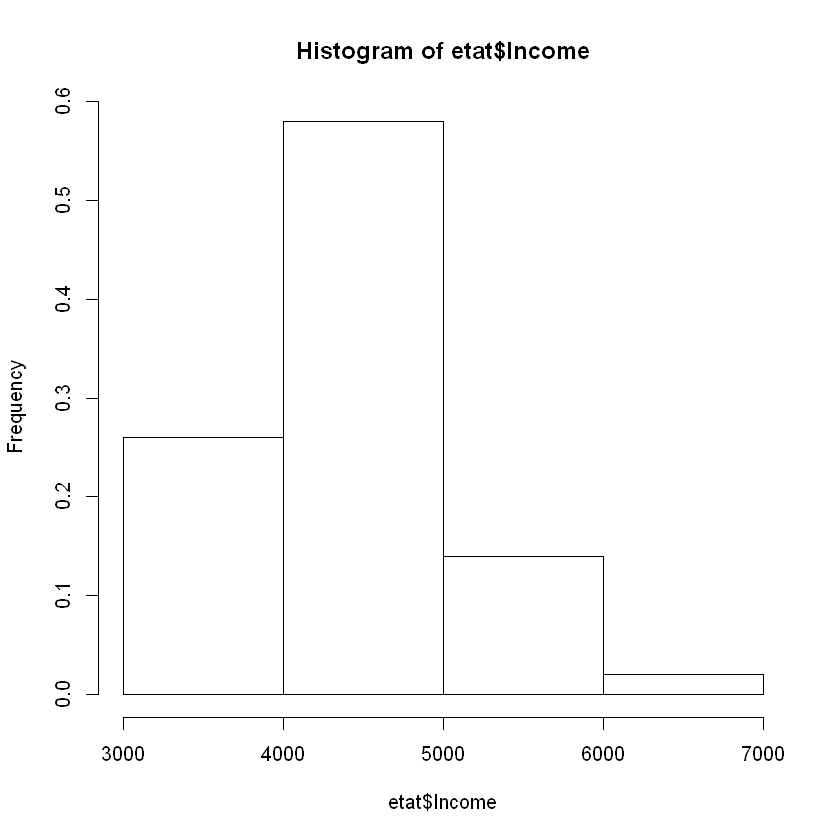

In [9]:
h <- hist(etat$Income,
          seq(3000, 7000, by = 1000),
          plot = F)

h$counts <- h$counts/sum(h$counts)
plot(h)

Superposer à ce graphe la densité estimée sur la variable Income avec la fonction lines.
Ajouter le titre *Histogramme des revenus* à l’aide de la fonction **title**.

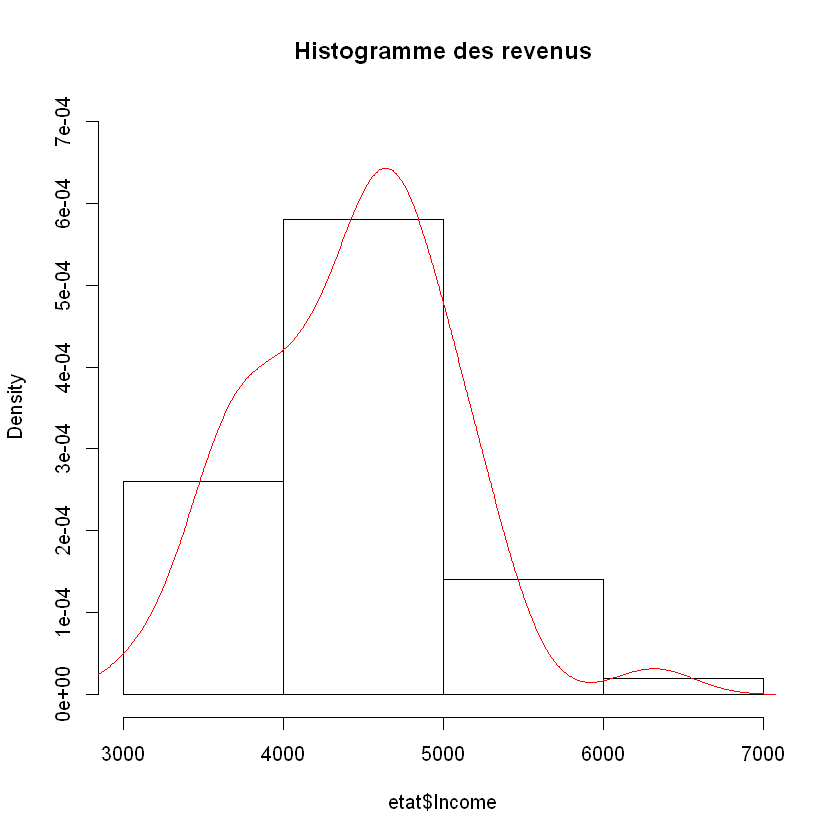

In [10]:
hist(etat$Income,
     seq(3000, 7000, by = 1000),
     probability = T,
     ylim = c(0, 7 * 10^-4),
     main = NULL)

lines(density(etat$Income),
      col = "red")

title("Histogramme des revenus")

Visualiser la répartition des valeurs de revenus grâce à un boxplot (fonction **boxplot**)

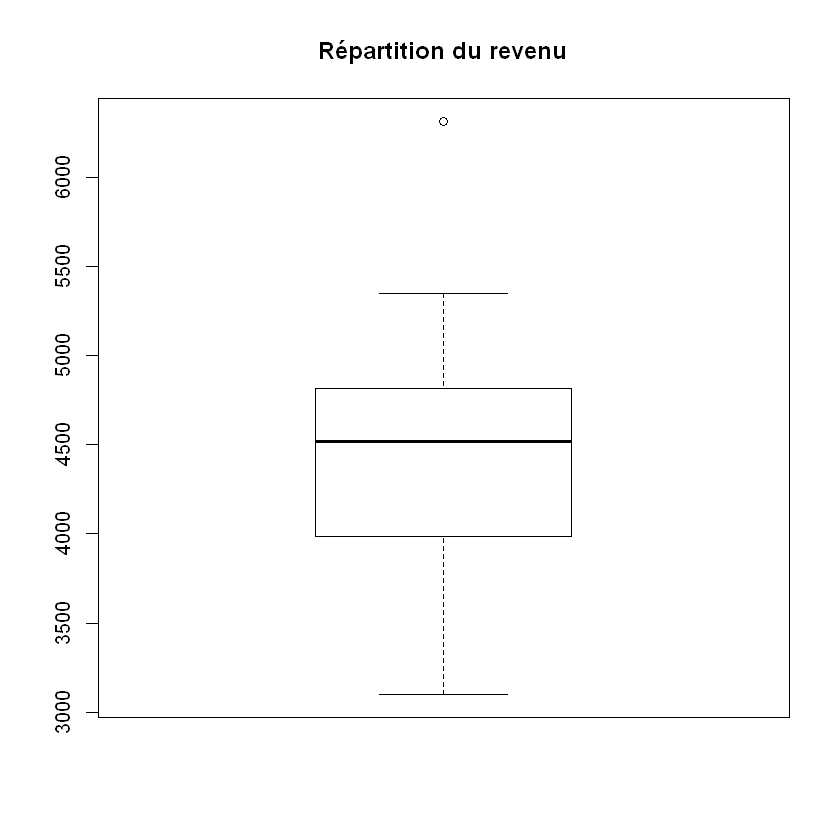

In [11]:
boxplot(etat$Income,
        main = "Répartition du revenu")

L’instruction **par(mfrow = c(n,p))** partitionne la fenêtre graphique en **np** graphes répartis sur **n** lignes et **p** colonnes. Représenter côte à côte l’histogramme et le boxplot précédents.

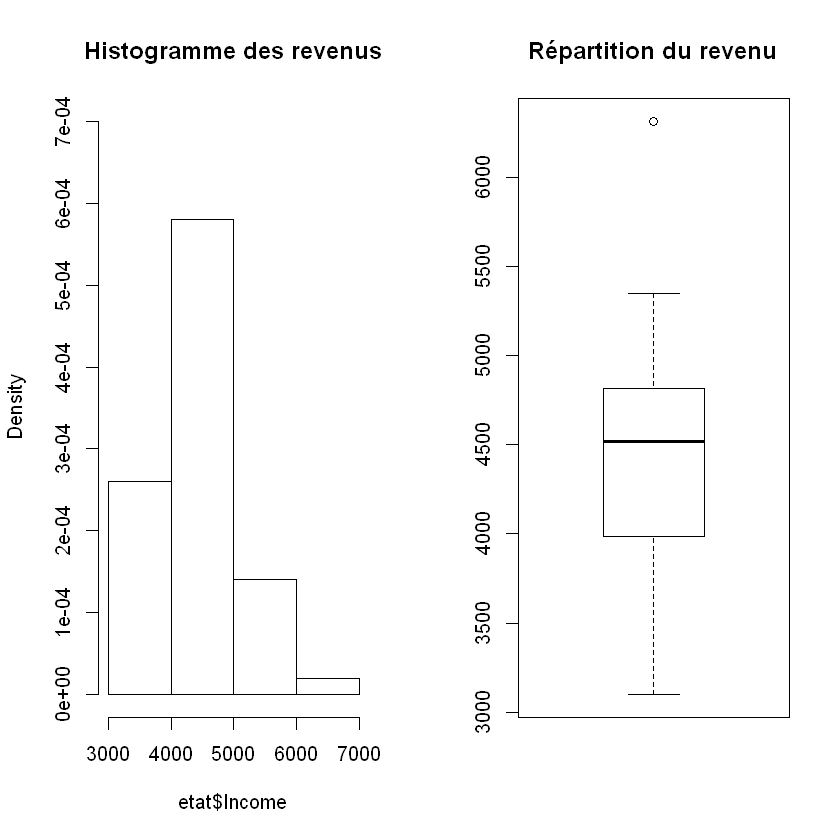

In [12]:
par(mfcol = c(1,2))

hist(etat$Income,
     seq(3000, 7000, by = 1000),
     probability = T,
     ylim = c(0, 7 * 10^-4),
     main = "Histogramme des revenus")

boxplot(etat$Income,
        main = "Répartition du revenu")

## Variable qualitative ou quantitative discrète
Créer le facteur Richesse à 3 niveaux

In [13]:
etat$Richesse <- cut(etat$Income,
                     breaks = c(0, 4000, 5000, Inf),
                     include.lowest = T,
                     labels = c("Pauvre", "Aisé", "Riche"))

Représenter la variable Richesse.

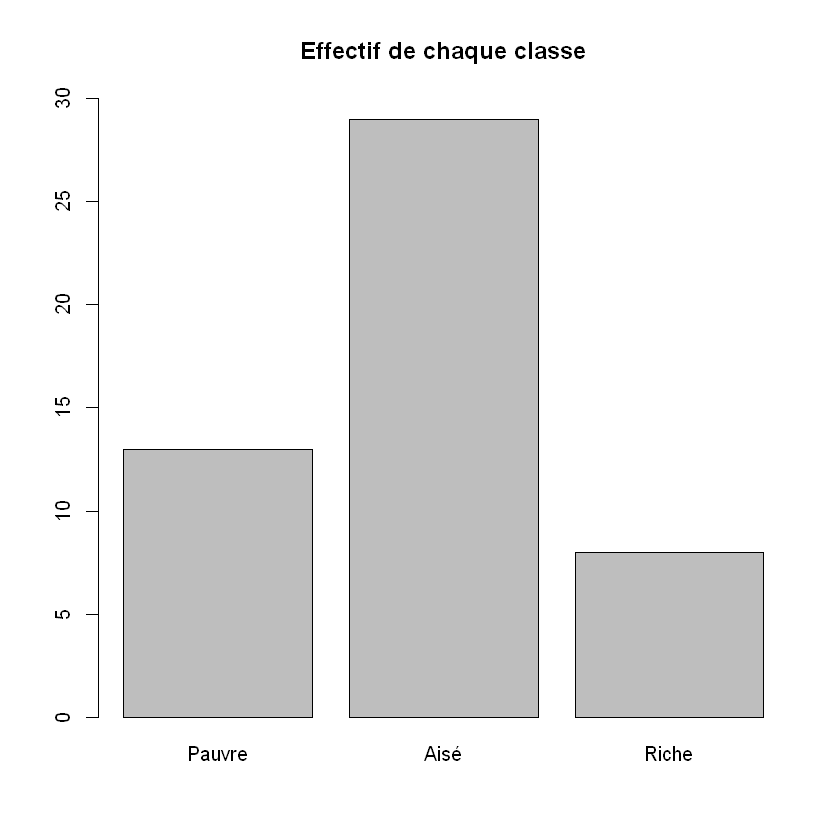

In [14]:
plot(etat$Richesse,
     ylim = c(0,30),
     main = "Effectif de chaque classe")

#equivalent barplot(table(etat$Richesse))

# Représentation de plusieurs variables
## Variables quantitatives/qualitatives
Jeu de données **UScereal**

In [15]:
require(MASS)
data(UScereal)
data <- UScereal

Loading required package: MASS


In [16]:
str(data)

'data.frame':	65 obs. of  11 variables:
 $ mfr      : Factor w/ 6 levels "G","K","N","P",..: 3 2 2 1 2 1 6 4 5 1 ...
 $ calories : num  212 212 100 147 110 ...
 $ protein  : num  12.12 12.12 8 2.67 2 ...
 $ fat      : num  3.03 3.03 0 2.67 0 ...
 $ sodium   : num  394 788 280 240 125 ...
 $ fibre    : num  30.3 27.3 28 2 1 ...
 $ carbo    : num  15.2 21.2 16 14 11 ...
 $ sugars   : num  18.2 15.2 0 13.3 14 ...
 $ shelf    : int  3 3 3 1 2 3 1 3 2 1 ...
 $ potassium: num  848.5 969.7 660 93.3 30 ...
 $ vitamins : Factor w/ 3 levels "100%","enriched",..: 2 2 2 2 2 2 2 2 2 2 ...


Représenter les boxplots du nombre de calories en fonction du niveau de l’étagère de présentation. 

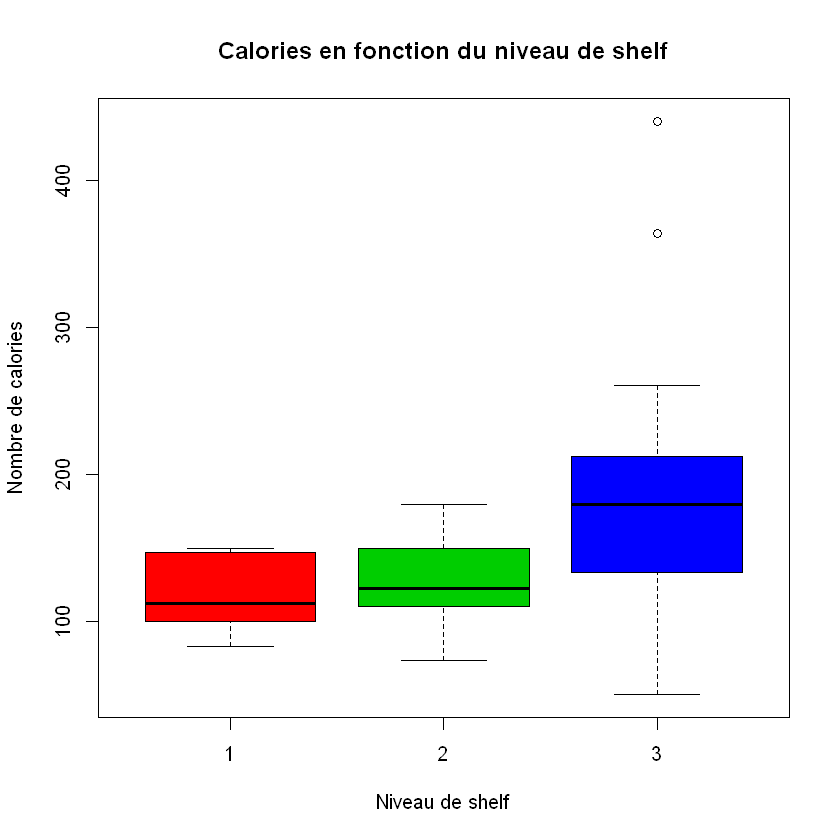

In [17]:
boxplot(data$calories ~ data$shelf,
        main = "Calories en fonction du niveau de shelf",
        ylab = "Nombre de calories",
        xlab = "Niveau de shelf",
        col = 2:4) # couleurs: 1:noir, 2:rouge, 3:vert, 4:bleu

Même chose pour la quantité de matières grasses.

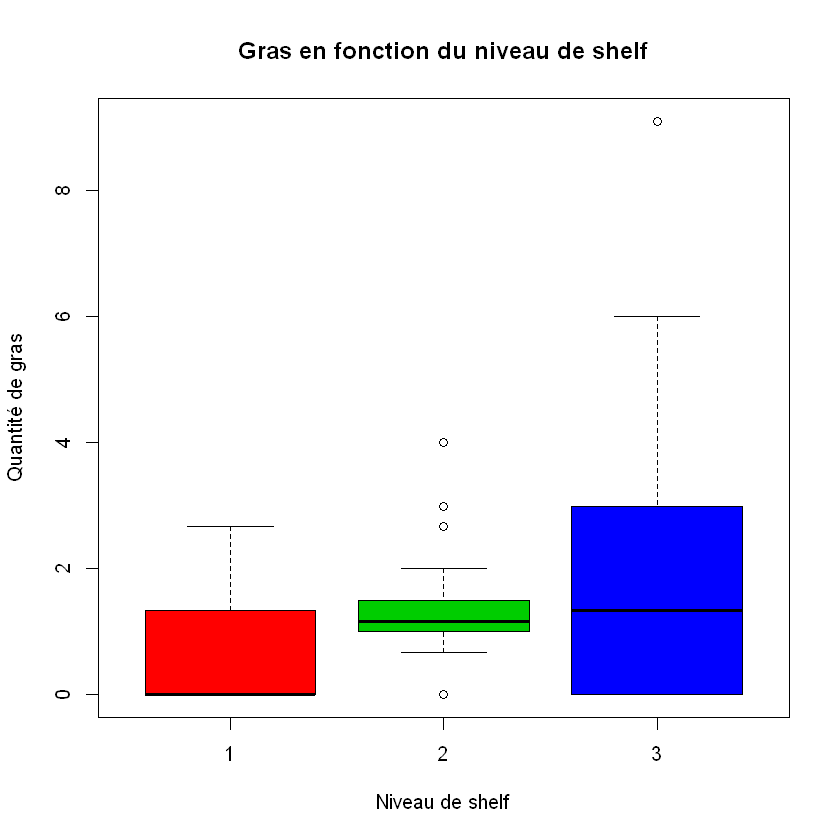

In [18]:
boxplot(data$fat ~ data$shelf,
        main = "Gras en fonction du niveau de shelf",
        ylab = "Quantité de gras",
        xlab = "Niveau de shelf",
        col = 2:4)

Le premier étage contient des céréales de faibles calories et un faible taux de matière grasse. Le taux de matière grasse médian des deux derniers étages sont proches, toutefois le 3e étage contient les céréales les plus caloriques.

## Variables quantitatives
Sur le jeu de données UScereal, représenter le nuage de points de la quantité de potassium en fonction de la quantité de fibres.

Ajouter la droite d’équation $y= 49.5 + 28.3x$ sur le graphique en rouge (fonction **abline**). Doubler la largeur du trait (argument **lwd**).

Calculer le centre de gravité du nuage de points, le représenter par une croix bleue sur le graphique (fonction **points**, argument **pch**) et écrire "G", toujours en bleu, juste en dessous via la fonction **text**.

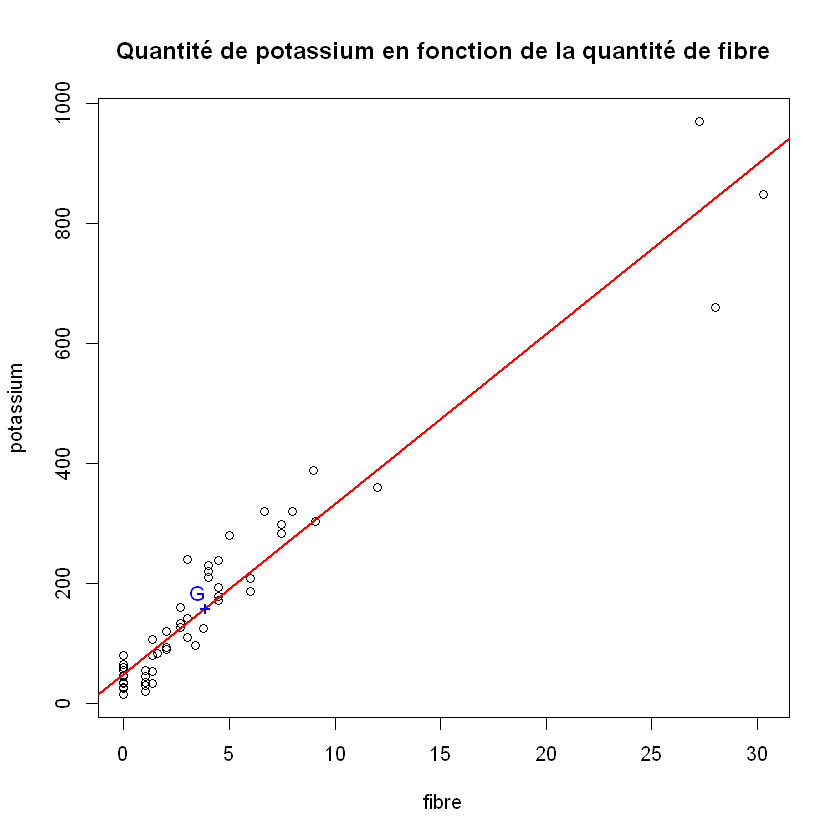

In [19]:
plot(potassium ~ fibre, data = data,
     main = "Quantité de potassium en fonction de la quantité de fibre")

abline(49.5, 28.3,
       col = "red",
       lwd = 2)

points(mean(data$fibre), mean(data$potassium),
       pch = "+",
       col = "blue")

text(mean(data$fibre), mean(data$potassium),
     "G", col = "blue",
     adj = c(1, -.5)) # Ajuster la position

Représenter les nuages des points pour tous les croisements deux à deux de variables quantitatives (fonction **pairs**)

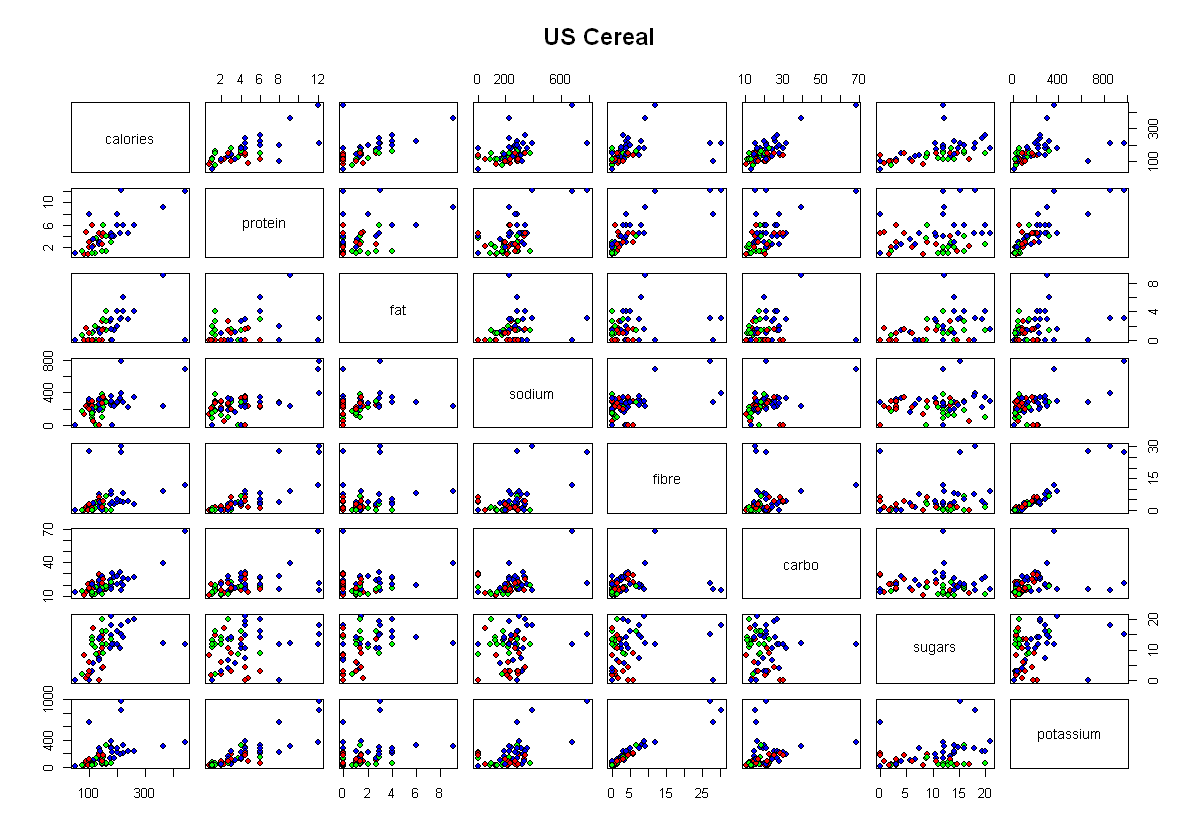

In [20]:
library(repr)
options(repr.plot.width=10) # Augmenter largeur plot

pairs(data[c(2:8, 10)],
      main = "US Cereal",
      pch = 21,
      bg = c("red", "green", "blue")[unclass(data$shelf)] # Colorer en fonction de shelf
     )

options(repr.plot.width=7) # Remettre par défaut

Charger à présent le jeu de données **EuStockMarkets**. Il est constitué de séries temporelles ou chronologiques, c’est-à-dire des quantités évoluant au cours du temps. Représenter sur un même graphique l’ensemble des séries à l’aide de la fonction **matplot**. Spécifier que les abscisses représentent le temps (*xlab*), les ordonnées, le prix de l’action (*ylab*) et ajouter une légende pour différencier les courbes. On peut utiliser la fonction **time** pour afficher les années en abscisse.

In [21]:
data(EuStockMarkets)
eumarket <- EuStockMarkets

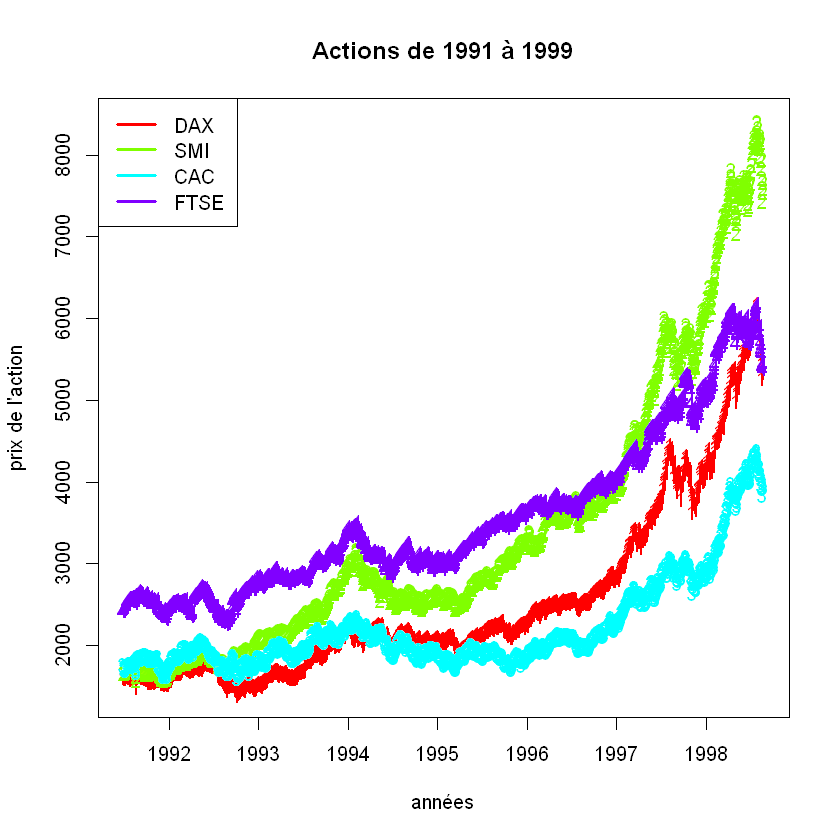

In [22]:
matplot(time(eumarket), eumarket,
        main = "Actions de 1991 à 1999",
        xlab = "années",
        ylab = "prix de l'action",
        col = rainbow(4)
       )

legend("topleft",
       legend = colnames(eumarket),
       lwd = 3,
       col = rainbow(4)
      )

# Graphique en 3 dimensions
Les fonctions classiques de représentation 3D sur des grilles de points sont les fonctions **persp** pour la représentation des surfaces avec effets de perspective,**contour** pour la représentation des lignes de niveau et **image** pour la représentation des lignes de niveau avec effets de couleur. On s’intéresse à la représentation de la fonction suivante ("chapeau mexicain") :
$$f : (x,y) \mapsto z = \frac{10 sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$

On commence par programmer la fonction $f$.

In [23]:
f = function(x,y) {
    a = sqrt(x^2+y^2);
    10*sin(a)/a
}

Créer deux vecteurs x et y de 200 valeurs chacun, comprises entre -10 et 10

In [24]:
x <- y <- seq(-10, 10, length.out = 200)

Calculer les valeurs de la fonctions en chaque couple de points de la grille (fonction **outer**)

In [25]:
z <- outer(x, y, f)

Tracer cette fonction à l’aide de la fonction **persp**.

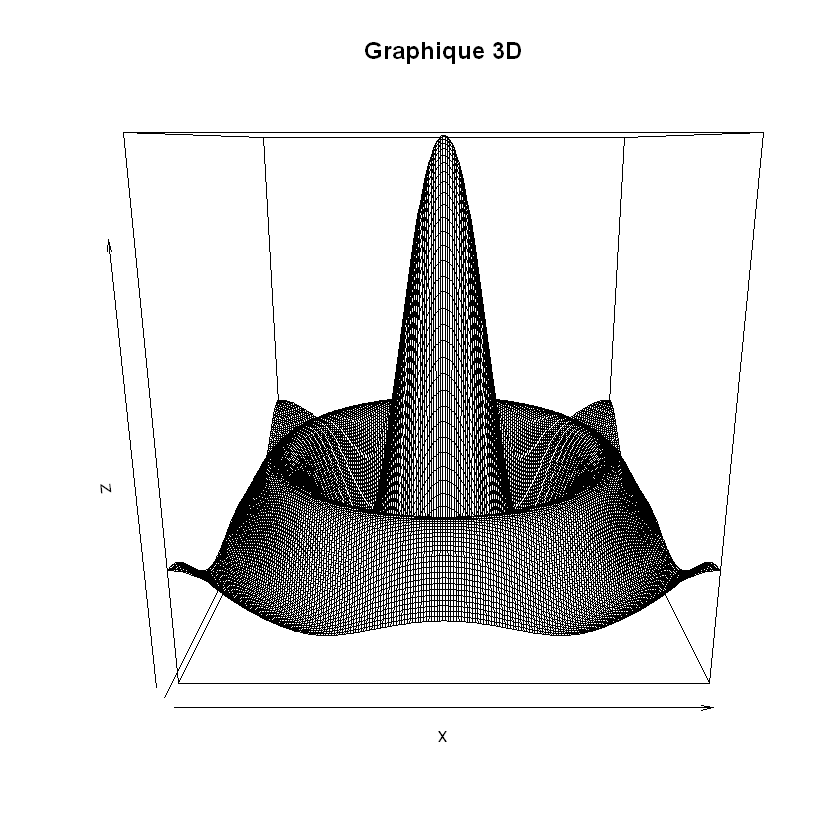

In [26]:
persp(x, y, z,
      main = "Graphique 3D"
     )

Faire pivoter cette figure à l’aide des arguments *theta* et *phi*.

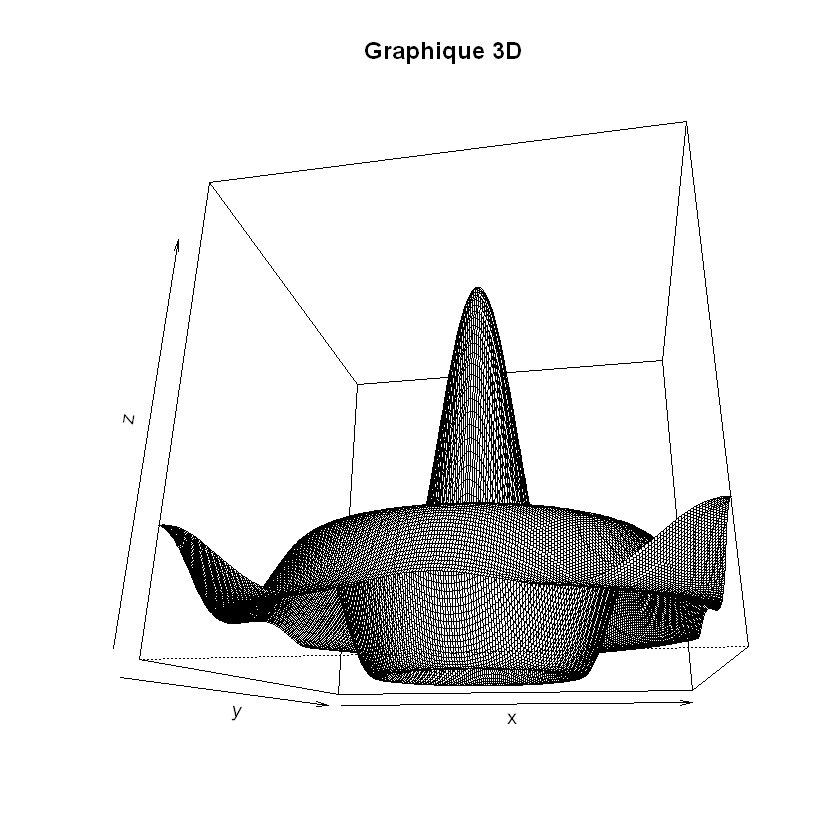

In [27]:
persp(x, y, z,
      main = "Graphique 3D",
      theta = 10, # Gauche-Droite
      phi = -20 # Haut-Bas
     )

Représenter la même fonction à l’aide des fonctions **contour** et **image**.

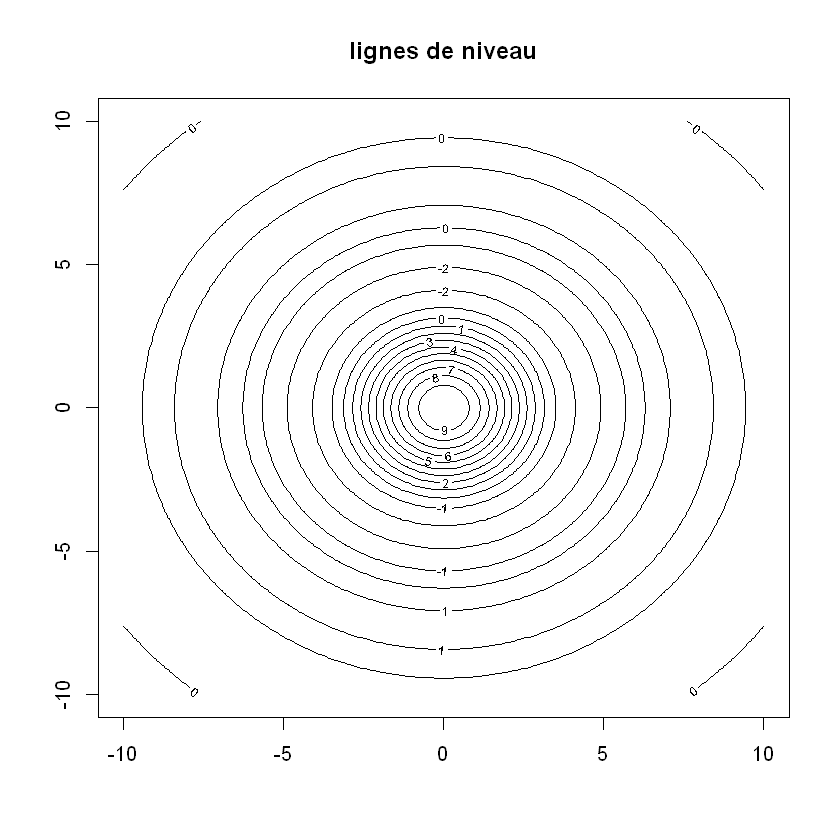

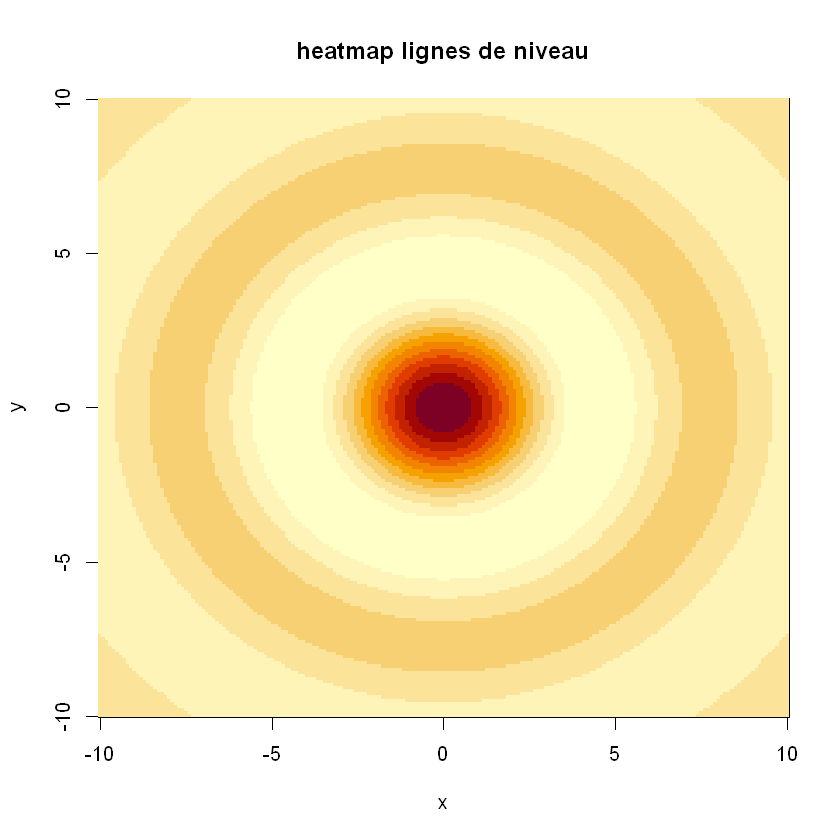

In [28]:
contour(x, y, z,
        main = "lignes de niveau"
       )

image(x, y, z,
      main = "heatmap lignes de niveau"
     )

À noter qu’il existe aussi un package appelé **rgl** permettant de faire des représentations 3D dans un mode interactif (c’est-à-dire permettant de faire des rotations graphiques à l’aide de la souris ou d’utiliser des effets d’éclairage).

# Graphes multiples
Reprenons à présent le jeu de données **UScereal**.

À l’aide de la fonction **par** et de l’argument *mfrow*, représenter en lignes les 3 graphiques suivants :
- Un premier représentant la quantité de sodium en fonction du producteur avec une couleur par niveau. Redéfinisser les limites du graphiques avec *ylim* pour avoir un graphique entre 0 et 400.
- Un deuxième représentant le nuage de points de la quantité de sodium en fonction de la quantité de sucre
- Un dernier représentant l’histogramme des quantités de sodium observées

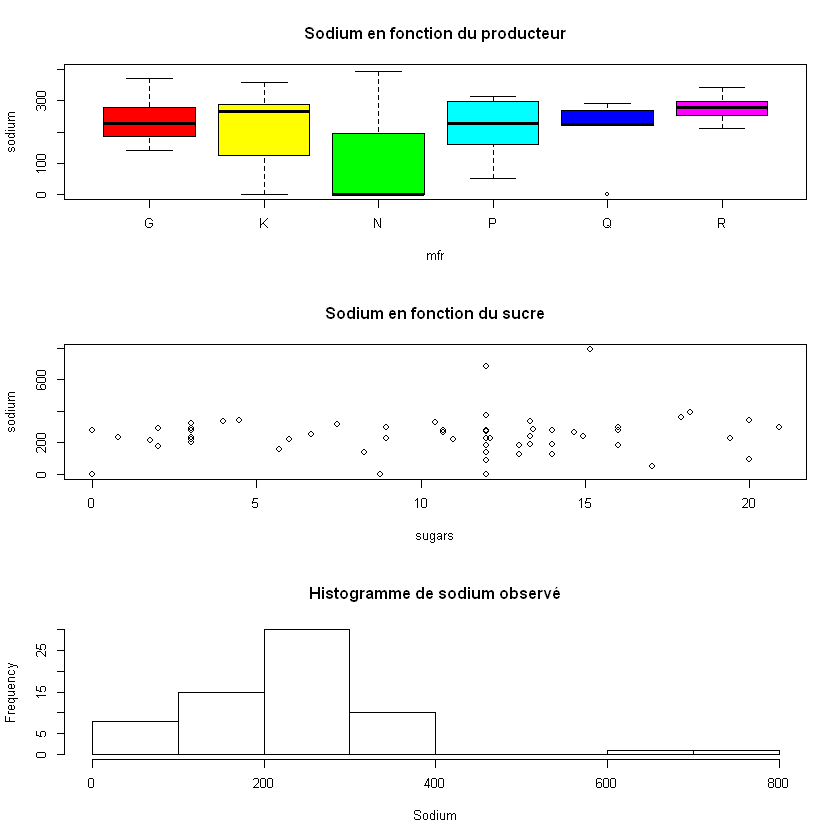

In [29]:
par(mfrow = c(3,1))

plot(sodium ~ mfr, data = data,
     col = rainbow(6),
     ylim = c(0, 400),
     main = "Sodium en fonction du producteur"
    )

plot(sodium ~ sugars, data = data,
     main = "Sodium en fonction du sucre"
    )

hist(data$sodium,
     main = "Histogramme de sodium observé",
     xlab = "Sodium"
    ) 

Faire les 3 mêmes graphiques (sans titre et sans légende des axes) mais sur deux lignes avec uniquement le premier graphe sur la première ligne et les deux autres côte à côte sur la deuxième ligne (fonction **layout**).

Rétrecir les marges de manière à maximiser les zones graphiques (fonction **par**, argument *mar*).

Ajouter le titre "Le sodium dans les céréales", commun aux trois graphiques à l’aide de lafonction **par**, argument *oma* (pour réserver une place pour le titre) et de la fonction **mtext**.

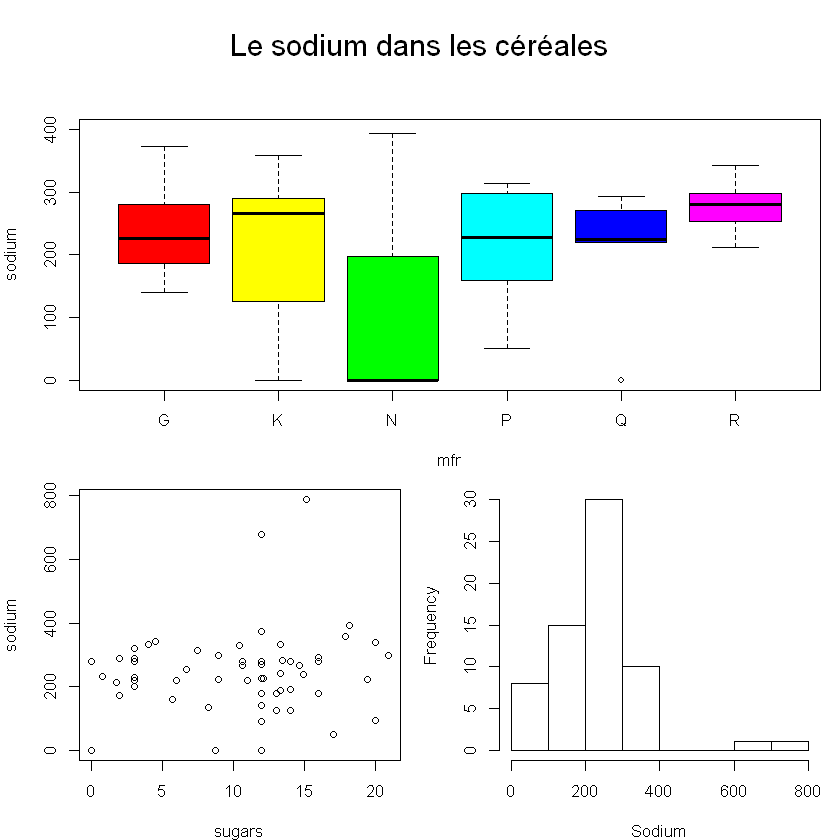

In [30]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

par(mar = c(4, 4, 1, 1), # margin: bottom, left, top, right
    oma = c(0, 0, 5, 0) # padding
   )

plot(sodium ~ mfr, data = data,
     col = rainbow(6),
     ylim = c(0, 400),
     main = ""
    )

mtext("Le sodium dans les céréales",
      side = 3, # 1: bottom... 4: right
      outer = T, # Aller en dehors de la marge
      line = 2, # which margin line, start from 0
      cex = 1.5 # font-size
     )

plot(sodium ~ sugars, data = data,
     main = ""
    )

hist(data$sodium,
     main = "",
     xlab = "Sodium"
    )